<a href="https://colab.research.google.com/github/adhish-bahl/2347203_NNDL_Lab/blob/main/Adhish_203_LabTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Importing Libraries**

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## **Answer 1**

#### **Helper Function**

In [84]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

def mcp_neuron(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)

def plot_decision_boundary(X, y, weights, bias):
    plt.figure()
    plt.title('MCP Neuron Decision Boundary')

    for i in range(X.shape[0]):
        if y[i] == 0:
            plt.scatter(X[i][0], X[i][1], color='red', label='Class 0' if i == 0 else "")
        else:
            plt.scatter(X[i][0], X[i][1], color='blue', label='Class 1' if i == 0 else "")

    x1 = np.linspace(-0.1, 1.1, 100)
    x2 = -(weights[0] * x1 + bias) / weights[1]

    plt.plot(x1, x2, '-g', label='Decision Boundary')

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='best')

    plt.grid(True)
    plt.show()

#### **Using Single Layer Perceptron to classify the XOR gate**

In [85]:
weights = np.array([1, 1])
bias = -1.5

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

print("MCP Neuron Predictions:")
for i in range(X.shape[0]):
    prediction = mcp_neuron(X[i], weights, bias)
    print(f"Input: {X[i]}, Prediction: {prediction}, Actual: {y[i]}")

MCP Neuron Predictions:
Input: [0 0], Prediction: 0, Actual: 0
Input: [0 1], Prediction: 0, Actual: 1
Input: [1 0], Prediction: 0, Actual: 1
Input: [1 1], Prediction: 1, Actual: 0


**Result:** The predicted outcome is not equal to the expected outcome. This shows that the single layer perceptron can not help with classifying the XOR gate. This is majorly because XOR gate is not linearly seperable.

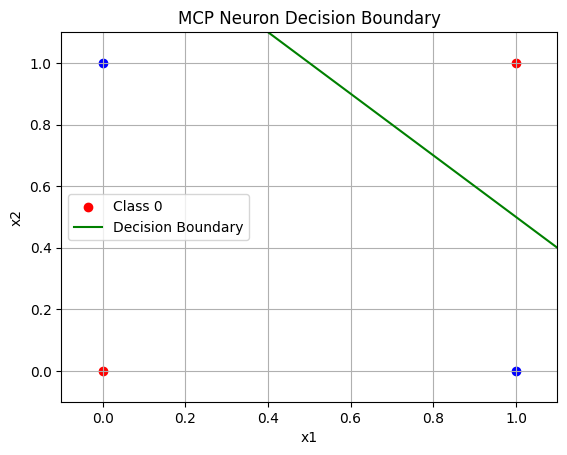

In [86]:
plot_decision_boundary(X, y, weights, bias)

**Result:** The XOR is not linearly seperable as seen in the graph. And Single layer Perceptron can only seperate the linearly separable classification.

#### **Using Multi Layer Perceptron to classioify the XOR gate**

In [87]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP_XOR:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.hidden_weights = np.random.rand(input_size, hidden_size)
        self.hidden_bias = np.random.rand(1, hidden_size)
        self.output_weights = np.random.rand(hidden_size, output_size)
        self.output_bias = np.random.rand(1, output_size)
        self.learning_rate = learning_rate

    def forward(self, X):
        self.hidden_layer_activation = np.dot(X, self.hidden_weights) + self.hidden_bias
        self.hidden_layer_output = sigmoid(self.hidden_layer_activation)

        self.output_layer_activation = np.dot(self.hidden_layer_output, self.output_weights) + self.output_bias
        self.predicted_output = sigmoid(self.output_layer_activation)
        return self.predicted_output

    def backward(self, X, y):
        error = y - self.predicted_output

        d_predicted_output = error * sigmoid_derivative(self.predicted_output)
        error_hidden_layer = d_predicted_output.dot(self.output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(self.hidden_layer_output)

        self.output_weights += self.hidden_layer_output.T.dot(d_predicted_output) * self.learning_rate
        self.output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * self.learning_rate

        self.hidden_weights += X.T.dot(d_hidden_layer) * self.learning_rate
        self.hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs=10000):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - self.predicted_output))
                print(f"Epoch {epoch}, Loss: {loss}")

In [88]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP_XOR(input_size=2, hidden_size=2, output_size=1)
mlp.train(X, y, epochs=10000)

Epoch 0, Loss: 0.31262807193639097
Epoch 1000, Loss: 0.24962234367766212
Epoch 2000, Loss: 0.24851922665443404
Epoch 3000, Loss: 0.24303730679706378
Epoch 4000, Loss: 0.2211475538791086
Epoch 5000, Loss: 0.1921840145425634
Epoch 6000, Loss: 0.17822850334087437
Epoch 7000, Loss: 0.1646417286810512
Epoch 8000, Loss: 0.0652939257053407
Epoch 9000, Loss: 0.017939652015700233


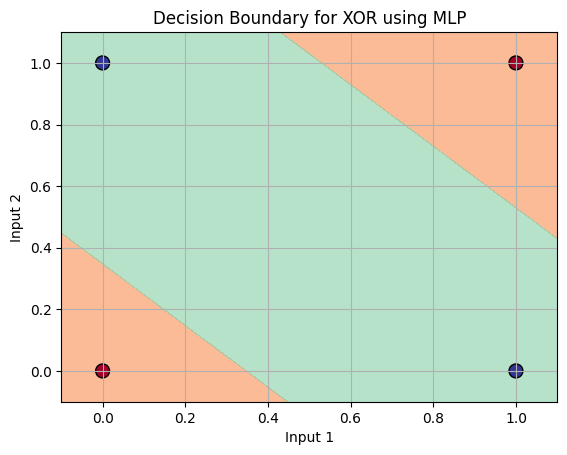

In [89]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([model.forward(point) for point in Z])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.Spectral, alpha=0.6)

    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.RdYlBu, edgecolor='k', s=100)
    plt.title("Decision Boundary for XOR using MLP")
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, mlp)

**Result:** Here we can see that the values are correctlt seperated into 2 different categories unlike in the single layer perceptron. This has been possible because of the use of Multi Layer Perceptron that is being used with MCP (McCulloch Pitts) Neuron.

In [90]:
print("Testing XOR using MLP:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {np.round(mlp.forward(X[i]))}, Actual Output: {y[i]}")

Testing XOR using MLP:
Input: [0 0], Predicted Output: [[0.]], Actual Output: [0]
Input: [0 1], Predicted Output: [[1.]], Actual Output: [1]
Input: [1 0], Predicted Output: [[1.]], Actual Output: [1]
Input: [1 1], Predicted Output: [[0.]], Actual Output: [0]


**Result:** Here we can see that the predected values are equal to the expected outcome which means that the model is working properly. Multi Layer Perceptron has made is possible to get the above predicted values.

## **Answer 2**

#### **Loading Dataset**

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df = pd.read_csv('/content/drive/MyDrive/Trimester5/NNDL/Lab/LabTest1/IMDB Dataset.csv')

#### **Displaying Dataset**

In [94]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


These are the top 5 rows of the dataset.

In [100]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


We can obser that we have 2 attributes in the dataset,

1) Review:  Which is the written review of the movie.

2) Sentiment: This says if the review is Positive or Negative. We can also observe that there are only 2 unique values in the attribute which has to be "Positive" and "Negative", as also seen in the above output.

There are exactly 25,000 "Positive" reviews and 25,000 "Negative" reviews, which will help us to train the model in a better way, as there are enough records for each sentiment.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


We can observe that there are 50,000 records in the dataset, and no record has an empty value in it. All the values are filled,

#### **Data Preprocessing**

In [101]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

print(df.head())

                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


Converted "Positive" into 1 and "Negative" into 0 ion the sentiment attribute in the dataset

In [102]:
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

df['review'] = df['review'].apply(clean_text)

Cleaning the text from the dataset by removing special chatrectors and converting whjole text into lower case.

In [103]:
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post')

**Tokenizer** makes sures to only keep the top 1000 words in the review attribute of each column.

**tokenizer.texts_to_sequences:** Converts each review into a sequence of integers as machine can not understand the langauge of worrds, but it do understand sequence of numbers.

**pad_sequences:** Ensures that all the sequences of reviews have the same length by padding them or even trimming them.

In [104]:
X = padded_sequences
y = np.array(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dividing dataset into X and y. X has the reviews while y ha sthe sentiments related to them.

X and y are then converted into training and testing dataset, where 80% goes for trainning.

#### **Define the ANN model**

In [105]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=16, input_length=50),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In the above model, hidden layer has ReLU activation, which helps to avoid the vanishing gradient problem and allows the model to learn complex patterns.

While output layer has Sigmoid activation, which is used in the output layer to return a probability score between 0 and 1, indicating the sentiment of the review (0 for negative, 1 for positive).

#### **Compiling the model**

In [106]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### **Trainning the model**

In [107]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=2)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.6967 - loss: 0.5538 - val_accuracy: 0.7714 - val_loss: 0.4636
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 109s 4ms/step - accuracy: 0.7941 - loss: 0.4300 - val_accuracy: 0.7685 - val_loss: 0.4766
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.8272 - loss: 0.3728 - val_accuracy: 0.7750 - val_loss: 0.4753
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy: 0.8592 - loss: 0.3205 - val_accuracy: 0.7618 - val_loss: 0.5342
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.8803 - loss: 0.2719 - val_accuracy: 0.7529 - val_loss: 0.5951
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.9009 - loss: 0.2301 - val_accuracy: 0.7462 - val_loss: 0.7108
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.9188 - loss: 0.1924 - val_accuracy: 0.7390 - val_loss: 0.8240
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy:

The model is compiled with binary cross-entropy as the loss function, which is ideal for binary classification problems like sentiment analysis.
The model is trained for 10 epochs, and we use a batch size of 2 for this dataset.

#### **Plot the accuracy and loss over epochs**

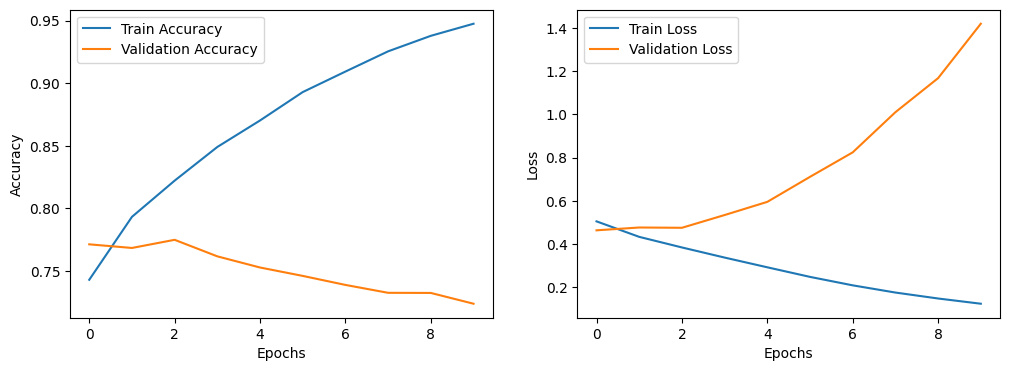

In [108]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

####**Accuracy Over Epochs PLot**

**Train Accuracy:**

The training accuracy improves consistently across epochs, reaching close to 95% by the 9th epoch.
This suggests that the model is learning from the training data effectively and its performance on the training set continues to improve.

**Validation Accuracy (Orange Line):**

The validation accuracy starts around 75% but decreases after the first few epochs. This decline in validation accuracy indicates that the model is overfitting to the training data.

#### **Loss Over Epochs**

**Train Loss:**

The training loss consistently decreases, which is expected as the model optimizes to reduce errors on the training data. Lower loss means the model is improving its fit to the training data.

**Validation Loss:**

The validation loss initially stays stable but starts increasing significantly after a few epochs. This increase signals that the model's predictions on the validation set are getting worse over time. This is the sign of overfitting.

#### **Evaluate the model on the test set**

In [109]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7356 - loss: 1.4123
Test Accuracy: 0.7239999771118164


A 72.4% accuracy means that your model is correctly predicting the sentiment of approximately 72.4% of the movie reviews in the test dataset. While this is a decent accuracy, it's far from perfect, indicating that the model still makes incorrect predictions on about 27.6% of the reviews. The model is overfitting as seen from the above graph which does not let it perform good in terms of accuracy. Techniques to rediuce Overfitting can help to increase the accuracy score of the model.

### **Why ReLU and Sigmoid Activations?**

ReLU (Rectified Linear Unit) is used in the hidden layer because it is computationally efficient and helps prevent the vanishing gradient problem, allowing for better learning in deep networks.
Sigmoid activation is used in the output layer for binary classification. It gives the output to a range between 0 and 1, which can be interpreted as the probability of the positive class (1).

### **Why Binary Cross-Entropy?**

Binary cross-entropy is a loss function that compares the predicted probability for the positive class with the actual label. It is suitable for tasks where the output is binary (0 or 1) and helps in optimizing the model to provide probabilities that are as close to the actual labels as possible.